# Analyze — Identifying the patterns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
plt.style.use('Solarize_Light2')

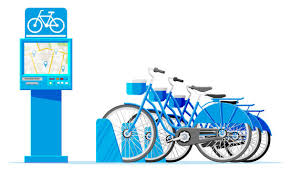

In [81]:
# Display a local image file
display(Image(filename=r"C:\Users\engal\Downloads\download.jpg"))

**Import dataset that been processed and cleaned**

In [3]:
df = pd.read_csv(r"C:\Users\engal\OneDrive\Desktop\My_studay\google_data_analytic_courses\Final_project\CaseStudy1-BikeShare\Prepare\Data\dataset_after_clean.csv")

In [7]:
df['start'] = pd.to_datetime(df.started_at)
df['end'] = pd.to_datetime(df.ended_at)
dur = (df.end - df.start)
dur_s = dur.dt.total_seconds()
dur_s.max()


86442.0

In [3]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [4]:
df['month_no'] = df['started_at'].dt.month

In [5]:
# Extract day of the week as a number (Monday=0, Sunday=6)
df['day'] = df['started_at'].dt.dayofweek

In [6]:
# Map day of the week to 1 for weekends (Saturday and Sunday) and 2 for weekdays
df['day_type'] = df['day'].apply(lambda x: 1 if x >= 5 else 2)

In [7]:
df.head()

,member_casual,rideable_type,started_at,ended_at,month,day_of_week,hour_day,year,ride_length,month_no,day,day_type
0,member,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,May,Sunday,19,2023,4.0,5,6,1
1,member,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,May,Saturday,18,2023,9.0,5,5,1
2,member,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,May,Sunday,0,2023,4.0,5,6,1
3,member,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,May,Wednesday,16,2023,12.0,5,2,2
4,member,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,May,Tuesday,18,2023,8.0,5,1,2


In [8]:
#Total Trip
df.shape

(5563845, 12)

In [9]:
df.groupby('member_casual')['ride_length'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2000488.0,20.743453,44.871493,1.0,6.0,12.0,22.0,1440.0
member,3563357.0,11.880443,21.319058,1.0,5.0,8.0,14.0,1439.0


# Trips  per type 

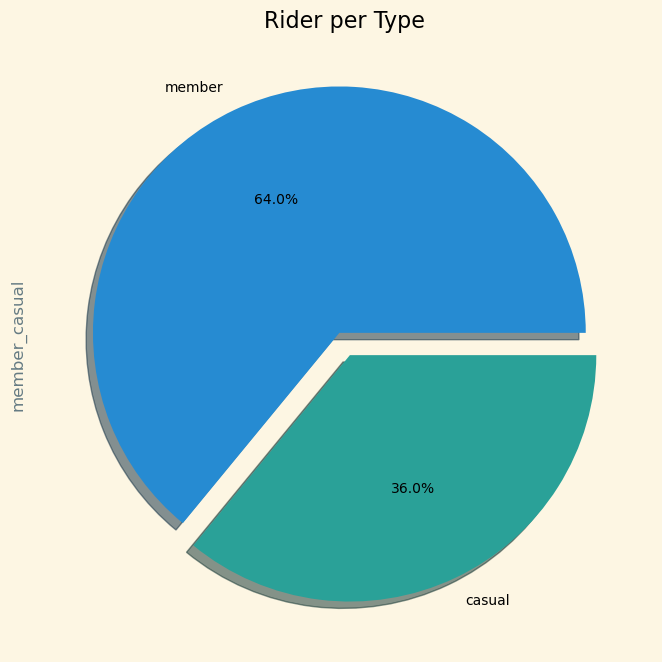

In [10]:
df['member_casual'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Rider per Type')
plt.show()

**It is clear that riders with annual membership are more than the casual riders.**

But still we need to convert those 36% to be an annual membership.

#### the annual avg duration of casual riders is more than the member rider, even though 64% of rider are member riders

# Trips Taken by the Month

In [11]:
# Group by month and category and count the occurrences
category_counts = df.groupby(['month_no', 'member_casual']).size().unstack(fill_value=0)

In [12]:
category_counts

member_casual,casual,member
month_no,,
1,38749,145246
2,41734,142601
3,60152,189289
4,142226,269042
5,226893,359461
6,292365,407691
7,321647,424776
8,302769,449397
9,255051,396144


<Figure size 1000x600 with 0 Axes>

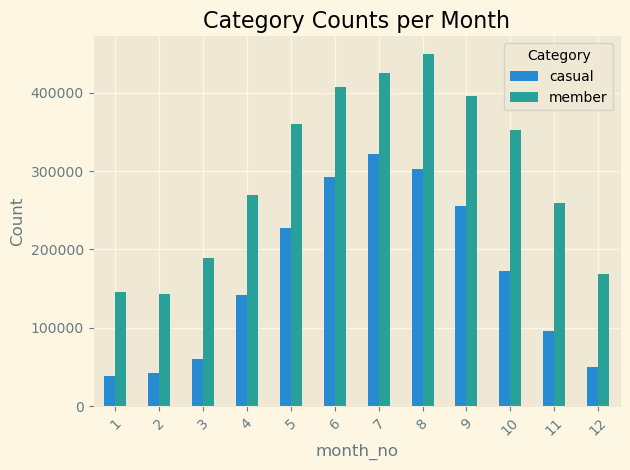

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', stacked=False)
plt.title('Category Counts per Month')
plt.xlabel('month_no')
plt.ylabel('Count')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [17]:
category_counts.describe()

member_casual,casual,member
count,12.000000,12.000000
mean,166707.333333,296946.416667
std,109643.880507,115122.364213
min,38749.000000,142601.000000
25%,57714.750000,184127.750000
50%,157359.000000,310679.000000
75%,264379.500000,399030.750000
max,321647.000000,449397.000000


In [18]:
df.groupby('month')['member_casual'].value_counts()

month      member_casual
April      member           269042
           casual           142226
August     member           449397
           casual           302769
December   member           168644
           casual            50403
February   member           142601
           casual            41734
January    member           145246
           casual            38749
July       member           424776
           casual           321647
June       member           407691
           casual           292365
March      member           189289
           casual            60152
May        member           359461
           casual           226893
November   member           258750
           casual            96007
October    member           352316
           casual           172492
September  member           396144
           casual           255051
Name: member_casual, dtype: int64

## Trips Taken by the Month Findings
**Specifically looking at the monthly data, we can see that:**
* Annual members recorded the highest number of bike trips in **August**, with 449,397 trips (**8.1%**), and the lowest in **February**, with 142,601 trips (**2.6%**).
* Casual riders recorded the highest number of bike trips in **July**, with 321,647 trips (**5.8%**), and the lowest in **January**, with 38,749 trips (**0.7%**).
* Both types of users recorded a **higher** number of trips in **summer** months.

*Percentages are calculated from the total number of bike trips observed in our data (5,563,845 trips).*

# Trips Taken by the Day of the Week

In [19]:
# Group by week and category and count the occurrences
week_counts = df.groupby(['day','day_of_week', 'member_casual']).size().unstack(fill_value=0)

In [20]:
week_counts

,member_casual,casual,member
day,day_of_week,,
0,Monday,228278,481793
1,Tuesday,239372,561796
2,Wednesday,242207,571412
3,Thursday,263024,573645
4,Friday,303098,517105
5,Saturday,398741,459719
6,Sunday,325768,397887


<Figure size 1000x600 with 0 Axes>

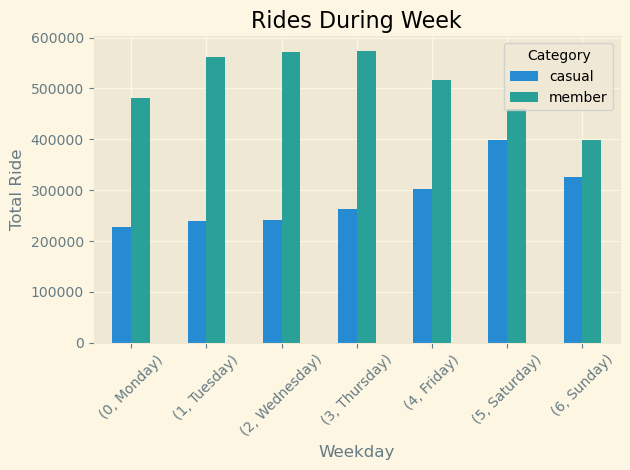

In [21]:
# Plotting
plt.figure(figsize=(10, 6))
week_counts.plot(kind='bar', stacked=False)
plt.title('Rides During Week')
plt.xlabel('Weekday')
plt.ylabel('Total Ride')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
Total_usage = df['ride_length'].mean()
Total_usage

15.067150145268245

In [26]:
total_weekday = df.groupby(['day_type','member_casual'])['ride_length'].mean().unstack(fill_value = 0)
total_weekday

member_casual,casual,member
day_type,,
1,23.897968,13.308692
2,18.952299,11.427750


## Trips Taken by the Day of the Week

#### When we look at the weekly data, we can observe that:
* Annual members used the bike-share program more frequently on **Thursday** at 573,645 (**10.3%**) trips and the least on **Sundays** at 397,887 (**7.2%**) trips.
* Casual riders used the bike-share program more frequently on **Saturdays** at 398,741 (**7.2%**) trips and the least on **Mondays** at 228,278 (**4.1%**) trips.
* Both customer types used the service more frequently on **weekdays** (Mon-Fri), but as a whole, casual riders had a higher usage rate on **weekends** (Sat-Sun) at **23.9** min compared to annual members at **13.3** min.


# Trips Taken by the Hour

In [27]:
category_count_day = df.groupby(['hour_day', 'member_casual']).size().unstack(fill_value=0)

In [34]:
category_count_day.describe()

member_casual,casual,member
count,24.000000,24.000000
mean,83353.666667,148473.208333
std,57653.992820,104637.941460
min,5765.000000,7725.000000
25%,34054.000000,49668.000000
50%,71964.000000,154170.000000
75%,128669.750000,200156.250000
max,193620.000000,377793.000000


In [36]:
category_count_day

member_casual,casual,member
hour_day,,
0,35612,34470
1,23077,20507
2,13934,11891
3,7660,7725
4,5765,8489
5,11136,33258
6,29380,102636
7,51725,190026
8,68983,238309


<Figure size 1000x600 with 0 Axes>

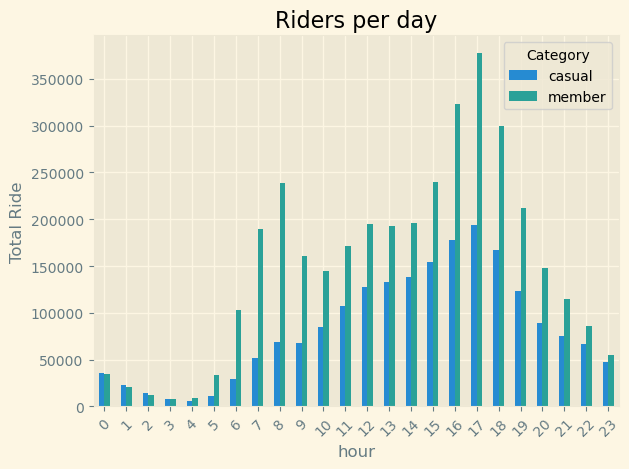

In [29]:
# Plotting
plt.figure(figsize=(10, 6))
category_count_day.plot(kind='bar', stacked=False)
plt.title('Riders per day')
plt.xlabel('hour')
plt.ylabel('Total Ride')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Weekly data along with hourly data

In [50]:
count_day_week = df.groupby(['day_of_week','hour_day', 'member_casual']).size().unstack(fill_value=0)

<Figure size 1000x600 with 0 Axes>

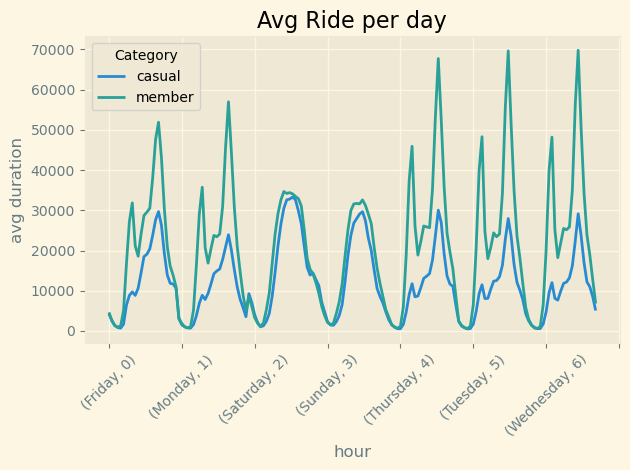

In [51]:
# Plotting
plt.figure(figsize=(10, 6))
count_day_week.plot(kind='line', stacked=False)
plt.title('Avg Ride per day')
plt.xlabel('hour')
plt.ylabel('avg duration')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trip Taken by the Hour findings

**If we look at the daily trips, we can determine that:**
* **Annual members** used Cyclistic bikes more frequently at **5PM** at 377,793 trips (**6.8%**), and the least at **3 AM** at 7,725 trips (**0.1%**)

* **Casual member** used Cyclistic bikes more frequently at **5PM** at 193,620 trips (**3.5%**), and the least at **4 AM** at 5,765 trips (**0.1%**).

* However, when we look at the weekly data along with the hourly data, we can see some patterns where there is a high level of bike trip activity from **4 PM — 5 PM** on **Tuesdays, Wednesdays, and Thursdays** for **annual members** and **12 PM — 3 PM** on **Saturdays** for **casual riders**


# Trip Duration

### Now let’s look at how these two groups performed in terms of trip duration.

In [14]:
# Group by month and category and find mean of the ride length
avg_duration_monthly = df.groupby(['month_no', 'member_casual'])['ride_length'].mean().unstack(fill_value=0)

In [55]:
avg_duration_monthly.describe()

member_casual,casual,member
count,12.000000,12.000000
mean,18.781143,11.479225
std,3.480230,1.178945
min,13.608403,9.909760
25%,15.763828,10.452701
50%,19.908448,11.345381
75%,21.892658,12.506060
max,22.983572,13.045586


In [56]:
avg_duration_monthly

member_casual,casual,member
month_no,,
1,13.608403,9.909760
2,15.978075,10.311926
3,15.341635,10.074030
4,20.898563,11.389579
5,22.321310,12.446274
6,21.871890,12.685419
7,22.983572,13.045586
8,21.954962,12.979248
9,21.131707,12.386041


<Figure size 1000x600 with 0 Axes>

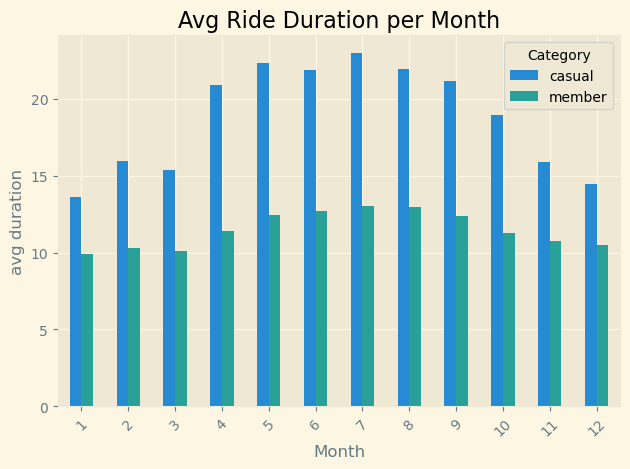

In [78]:
# Plotting
plt.figure(figsize=(10, 6))
avg_duration_monthly.plot(kind='bar', stacked=False)
plt.title('Avg Ride Duration per Month')
plt.xlabel('Month')
plt.ylabel('avg duration')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
avg_duration_weekly = df.groupby(['day','day_of_week', 'member_casual'])['ride_length'].mean().unstack(fill_value=0)
avg_duration_weekly

,member_casual,casual,member
day,day_of_week,,
0,Monday,20.360972,11.248125
1,Tuesday,18.495781,11.385745
2,Wednesday,17.621695,11.307188
3,Thursday,18.023671,11.389061
4,Friday,20.121037,11.816884
5,Saturday,23.571200,13.311860
6,Sunday,24.297933,13.305031


<Figure size 1000x600 with 0 Axes>

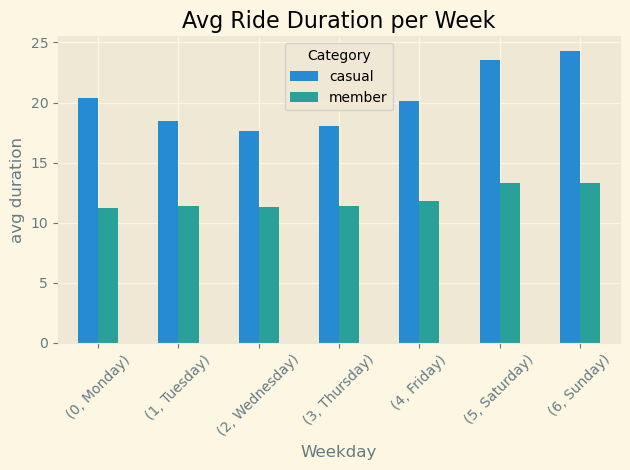

In [77]:
# Plotting
plt.figure(figsize=(10, 6))
avg_duration_weekly.plot(kind='bar', stacked=False)
plt.title('Avg Ride Duration per Week')
plt.xlabel('Weekday')
plt.ylabel('avg duration')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
avg_duration_day = df.groupby(['hour_day', 'member_casual'])['ride_length'].mean().unstack(fill_value=0)

In [54]:
avg_duration_day.describe()

member_casual,casual,member
count,24.000000,24.000000
mean,19.289967,11.670967
std,3.439624,0.726213
min,13.416577,9.722563
25%,17.906579,11.520289
50%,18.606666,11.803263
75%,21.212690,12.214336
max,24.995823,12.690217


In [59]:
avg_duration_day

member_casual,casual,member
hour_day,,
0,18.242334,11.230055
1,18.077523,11.641391
2,18.067030,11.791943
3,17.776501,12.224984
4,15.801041,11.617034
5,13.416577,9.722563
6,14.484717,10.205483
7,13.756945,10.684391
8,15.324428,10.828676


<Figure size 1000x600 with 0 Axes>

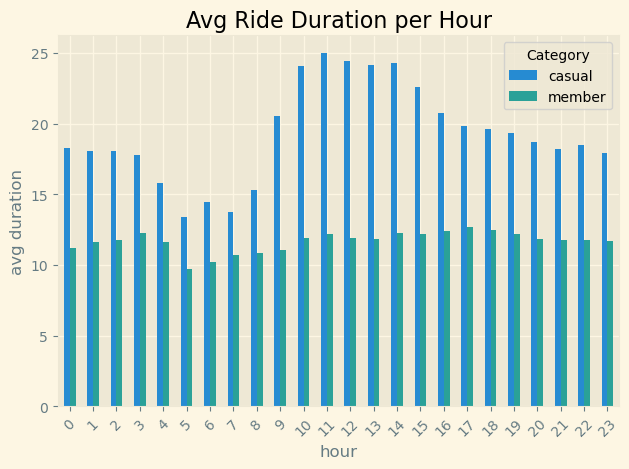

In [76]:
# Plotting
plt.figure(figsize=(10, 6))
avg_duration_day.plot(kind='bar', stacked=False)
plt.title('Avg Ride Duration per Hour')
plt.xlabel('hour')
plt.ylabel('avg duration')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trips Duration Findings

**Note: Our data has been filtered to include relevant ride lengths that are greater than 0 minutes and less than 24 hours.**

* On average, annual members had a trip duration of **11.8 minutes** while casual riders had a trip duration of **20.7 minutes**

* Annual members had the highest mean trip duration on **Saturday at 13.3 minutes** and the lowest on **Mondays at 11.2 minutes**

* Casual riders had the highest mean trip duration on **Sundays at 24.3 minutes** and the lowest on **Wednesdays at 17.6 minutes**

* Seasonally, we can see that both groups had a greater mean trip duration during **warmer months** compared to colder months. This is in-line with our analysis on trips taken by the months.


# Recommendations

* **Introduce a new annual membership option that considers the uses of current casual riders. Casual riders seem to prefer using the service as a form of leisure and physical activity, especially on the weekends. The membership would include offerings tailored towards the behaviors of casual riders to encourage them to choose a Cyclistic membership plan**

* **Implement a dual pricing model with annual and monthly plans with the annual plan being the most cost effective to encourage casual riders to subscribe**

* **Take advantage of the high level of ride activity during the summer months by partnering with local businesses to encourage member-only deals and discounts**